# Implementation of Cookie Generator in Python

In [271]:
import json
f = open('recipes.json')
data = json.load(f)
f.close()

## Loading the Inspiring Set

We start by loading the inspiring set from a JSON string. We'll also load some helpful libraries.

In [272]:
import pprint
import random
import re

recipes = data['recipes']

To check what we have loaded we can use the pretty printing library (pprint).

In [273]:
pprint.PrettyPrinter(indent=2, depth=3).pprint(recipes[0])

{ 'ingredients': [ { 'amount': 0.75,
                     'ingredient': 'granulated artificial sweetener',
                     'taste_score': 3,
                     'type': 'Sweetener',
                     'unit': 'cup'},
                   { 'amount': 2,
                     'ingredient': 'water',
                     'taste_score': 2,
                     'type': 'Liquid',
                     'unit': 'tablespoons'},
                   { 'amount': 0.5,
                     'ingredient': 'vanilla extract',
                     'taste_score': 4,
                     'type': 'Flavor',
                     'unit': 'teaspoon'},
                   { 'amount': 1,
                     'ingredient': 'egg beaten',
                     'taste_score': 4,
                     'type': 'Binding',
                     'unit': ' '},
                   { 'amount': 1.125,
                     'ingredient': 'all-purpose flour',
                     'taste_score': 3,
                     'type': 'Bind

Next we extract all of the ingredients and ingredient types from the recipes, so that we can use them in mutation operators.

In [274]:
all_ingredients = []
all_types_set = set()

for recipe in recipes:
    all_ingredients.extend(recipe['ingredients'])
    for ingredient in recipe['ingredients']:
        all_types_set.add(ingredient['type'])

all_types = list(all_types_set)


In [275]:
pprint.PrettyPrinter(indent=2, depth=2).pprint(all_types)

[ 'Sweetener',
  'Binding',
  'Add-in',
  'Rising',
  'Seasoning',
  'Texture',
  'Liquid',
  'Fat',
  'Flavor']


To check on the complete list of ingredients, we can use the pprint library to provide formatted list.

In [276]:
pprint.PrettyPrinter(indent=2, depth=2).pprint(all_ingredients)

[ { 'amount': 0.75,
    'ingredient': 'granulated artificial sweetener',
    'taste_score': 3,
    'type': 'Sweetener',
    'unit': 'cup'},
  { 'amount': 2,
    'ingredient': 'water',
    'taste_score': 2,
    'type': 'Liquid',
    'unit': 'tablespoons'},
  { 'amount': 0.5,
    'ingredient': 'vanilla extract',
    'taste_score': 4,
    'type': 'Flavor',
    'unit': 'teaspoon'},
  { 'amount': 1,
    'ingredient': 'egg beaten',
    'taste_score': 4,
    'type': 'Binding',
    'unit': ' '},
  { 'amount': 1.125,
    'ingredient': 'all-purpose flour',
    'taste_score': 3,
    'type': 'Binding',
    'unit': 'cups'},
  { 'amount': 0.5,
    'ingredient': 'baking soda',
    'taste_score': 3,
    'type': 'Rising',
    'unit': 'teaspoon'},
  { 'amount': 0.5,
    'ingredient': 'salt',
    'taste_score': 2,
    'type': 'Seasoning',
    'unit': 'teaspoon'},
  { 'amount': 0.5,
    'ingredient': 'semisweet chocolate chips',
    'taste_score': 5,
    'type': 'Add-in',
    'unit': 'cup'},
  { 'amount':

## Creating an Initial Population

Now we can create an initial population, by first defining the population size and then selecting from the list of recipes.

In [277]:
population_size = 20

population = random.choices(recipes, k=population_size)

And we can check on the recipes that were selected in the initial population.

In [278]:
pprint.PrettyPrinter(indent=2, depth=2).pprint(population)

[ {'ingredients': [...], 'name': 'Pecan-Balls'},
  {'ingredients': [...], 'name': 'no-bake-bumpy-peanut-butter-nuggets'},
  {'ingredients': [...], 'name': 'vanilla-meringue-cookies'},
  {'ingredients': [...], 'name': 'no-sugar-raisin-cookies'},
  {'ingredients': [...], 'name': 'chocolate-peanut-butter-cookies'},
  {'ingredients': [...], 'name': 'Grandmas-Oatmeal-Raisin-Cookies'},
  {'ingredients': [...], 'name': 'Fruity-Fingerprint-Cookies'},
  {'ingredients': [...], 'name': 'sugar-free-date-cookies'},
  {'ingredients': [...], 'name': 'Fudgy-Chocolate-Cookies'},
  {'ingredients': [...], 'name': 'soft-sugar-cookies'},
  {'ingredients': [...], 'name': 'triple-ginger-gingersnaps'},
  {'ingredients': [...], 'name': 'brownie-cookies'},
  {'ingredients': [...], 'name': 'mocha-meringue-sandwich-cookies'},
  {'ingredients': [...], 'name': 'swirled-mint-cookies'},
  {'ingredients': [...], 'name': 'Chocolate-Chip-Carrot-Cookies-EDR'},
  {'ingredients': [...], 'name': 'low-carb-almond-cinnamon-bu

## Evaluating Recipes (Fitness Function)

The following function defines how individuals are evaluated:

In [279]:
def evaluate_recipes(population, all_types):
    for r in population:
        total_taste_score = 0
        included_types = set()

        for ingredient in r['ingredients']:
            total_taste_score += ingredient['taste_score']
            included_types.add(ingredient['type'])

        # Calculate mean taste score
        if len(r['ingredients']) == 0:
            mean_taste_score = 0
        else:
            mean_taste_score = total_taste_score / len(r['ingredients'])
        r['mean_taste_score'] = mean_taste_score

        # Count unique types included in the recipe
        count_included_types = sum(1 for t in all_types if t in included_types)
        r['included_types_count'] = count_included_types

    
    return population


We can use this to evaluate the initial population.

In [280]:
evaluate_recipes(population, all_types)

[{'name': 'Pecan-Balls',
  'ingredients': [{'amount': 0.5,
    'unit': 'cup',
    'ingredient': 'all-purpose flour',
    'taste_score': 3,
    'type': 'Binding'},
   {'amount': 0.5,
    'unit': 'cup',
    'ingredient': 'whole-wheat pastry flour',
    'taste_score': 3,
    'type': 'Binding'},
   {'amount': 0.75,
    'unit': 'cup',
    'ingredient': 'finely chopped pecans',
    'taste_score': 4,
    'type': 'Add-in'},
   {'amount': 0.5,
    'unit': ' ',
    'ingredient': 'ground cinnamon',
    'taste_score': 3,
    'type': 'Seasoning'},
   {'amount': 0.125,
    'unit': 'g',
    'ingredient': 'salt',
    'taste_score': 2,
    'type': 'Seasoning'},
   {'amount': 0.33,
    'unit': 'cup',
    'ingredient': 'margarine',
    'taste_score': 3,
    'type': 'Fat'},
   {'amount': 0.5,
    'unit': 'cup',
    'ingredient': "confectioners' sugar, plus more for dusting cookies",
    'taste_score': 3,
    'type': 'Sweetener'},
   {'amount': 1,
    'unit': ' ',
    'ingredient': 'egg white',
    'taste_

In [281]:
pprint.PrettyPrinter(indent=2, depth=2).pprint(population)

[ { 'included_types_count': 6,
    'ingredients': [...],
    'mean_taste_score': 3.111111111111111,
    'name': 'Pecan-Balls'},
  { 'included_types_count': 4,
    'ingredients': [...],
    'mean_taste_score': 3.142857142857143,
    'name': 'no-bake-bumpy-peanut-butter-nuggets'},
  { 'included_types_count': 5,
    'ingredients': [...],
    'mean_taste_score': 3.4,
    'name': 'vanilla-meringue-cookies'},
  { 'included_types_count': 8,
    'ingredients': [...],
    'mean_taste_score': 3.5,
    'name': 'no-sugar-raisin-cookies'},
  { 'included_types_count': 5,
    'ingredients': [...],
    'mean_taste_score': 3.6363636363636362,
    'name': 'chocolate-peanut-butter-cookies'},
  { 'included_types_count': 8,
    'ingredients': [...],
    'mean_taste_score': 3.0,
    'name': 'Grandmas-Oatmeal-Raisin-Cookies'},
  { 'included_types_count': 6,
    'ingredients': [...],
    'mean_taste_score': 3.0,
    'name': 'Fruity-Fingerprint-Cookies'},
  { 'included_types_count': 8,
    'ingredients': [...]

## Selecting Recipes

The following function implements Roulette Wheel selection of individuals based on their fitness:

In [282]:
def select_recipe(recipes):
  sum_types_count = sum([recipe['included_types_count'] for recipe in recipes])
  types = random.randint(0, sum_types_count)
  taste = random.randint(1,5)
  for recipe in recipes:
    if types < recipe['included_types_count']:
        return recipe 
    types -= recipe['included_types_count']
  return recipes[-1]

## Genetic Operators

The following functions implement the genetic operators of crossover and mutation. Crossover takes two recipes and combines them by choosing a point on each genotype (recipe) to split each list into two, and joining the first sublist from one genotype with the second sublist of the second genotype.

In [283]:
recipe_number = 1

def crossover_recipes(r1, r2):
  global recipe_number
  p1 = random.randint(1, len(r1['ingredients'])-1)
  p2 = random.randint(1, len(r2['ingredients'])-1)
  r1a = r1['ingredients'][0:p1]
  r2b = r2['ingredients'][p2:-1]
  r = dict()
  r['name'] = "recipe {}".format(recipe_number)
  recipe_number += 1
  r['ingredients'] = r1a + r2b
  return r

The mutation operator changes a recipe using one of four different types of mutations: (1) do nothing, (2) swap ingredients, (3) adding an ingredient, and (4) removing an ingredient.

In [284]:
def mutate_recipe(r):
  m = random.randint(0, 9)
  if m>=0 and m<=3:         # do nothing
    pass
  elif m>=4 and m<=7:       # swap
    r['ingredients'].append(random.choice(all_ingredients).copy())
    r['ingredients'].remove(random.choice(r['ingredients']))
  elif m==8:                # add ingredient
    r['ingredients'].append(random.choice(all_ingredients).copy())
  else:                     # remove ingredient
    r['ingredients'].remove(random.choice(r['ingredients']))      

The following function is domain-specific and normalises a generated recipe by removing duplicate ingredients (combining the amounts of all instances of an ingredient).

In [285]:
def normalise_recipe(r):
  unique_ingredients = dict()
  for i in r['ingredients']:
    if i['ingredient'] in unique_ingredients:
      n = unique_ingredients[i['ingredient']]
      n['amount'] += i['amount']
    else:
      unique_ingredients[i['ingredient']] = i.copy()
  r['ingredients'] = list(unique_ingredients.values())

## Generating Recipes

We use the above functions to generate recipes.

In [286]:
def generate_recipes(size, population):
    R = []
    while len(R) < size:
        r1 = select_recipe(population)
        r2 = select_recipe(population)
        r = crossover_recipes(r1, r2)
        mutate_recipe(r)
        normalise_recipe(r)
        R.append(r)
    evaluate_recipes(R, all_types)
    return R


## Selecting a New Population

The final function that we need to implement is one that selects a new population given the previous population and the generated recipes.

In [287]:
def select_population(P, R):

    R = sorted(R, key=lambda r: (r['included_types_count'], r['mean_taste_score']), reverse=True)
    P = P[0:len(P)//2] + R[0:len(R)//2]
    P = sorted(P, key=lambda r: (r['included_types_count'], r['mean_taste_score']), reverse=True)
    

    return P

In [288]:
population_size = 20
evaluate_recipes(recipes, all_types)
population = [select_recipe(recipes) for _ in range(population_size)]

# Evolution loop
max_mean_taste_scores = []
min_mean_taste_scores = []
max_include_types_count = []
min_include_types_count = []

iterations = 0
while population[0]['mean_taste_score'] < 3.5 or population[0]['included_types_count'] < 9 or iterations < 100:
    R = generate_recipes(population_size, population)
    population = select_population(population, R)
    max_mean_taste_scores.append(population[0]['mean_taste_score'])
    min_mean_taste_scores.append(population[-1]['mean_taste_score'])
    max_include_types_count.append(population[0]['included_types_count'])
    min_include_types_count.append(population[-1]['included_types_count'])
    iterations += 1

## Putting it All Together...

To run the genetic algorithm, we repeat here the code to set up and evaluated an initial population, before running the evolutionary process for a number of steps.

We can check on the progress of the evolution by plotting the fitness history we captured above. Here we plot both the maximum fitness each population and the range fitnesses (filling between max fitness and min fitness).

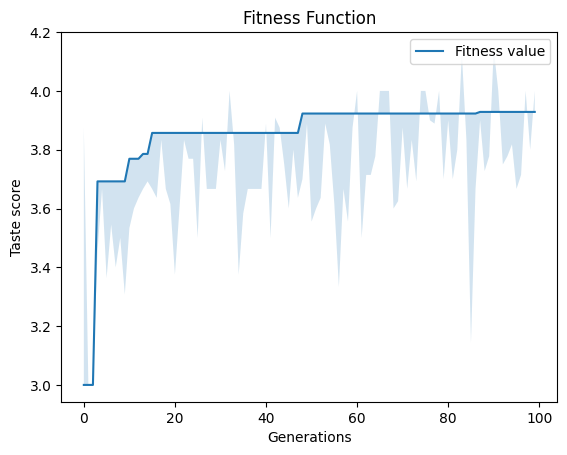

In [289]:
import matplotlib.pyplot as plt

x  = range(iterations)
plt.plot(x, max_mean_taste_scores, label="Fitness value")
plt.fill_between(x, min_mean_taste_scores, max_mean_taste_scores, alpha=0.2)
plt.plot()

plt.xlabel("Generations")
plt.ylabel("Taste score")
plt.title("Fitness Function")
plt.legend()
plt.show()

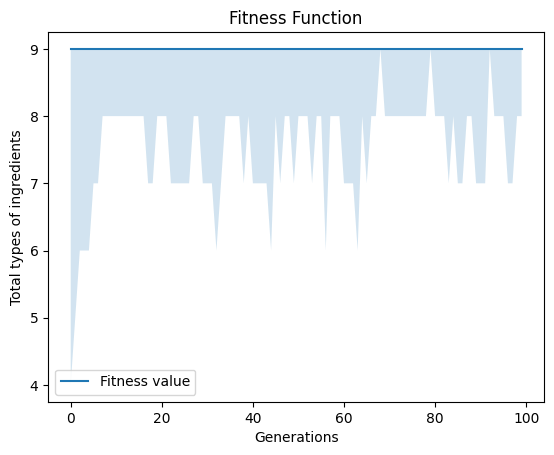

In [290]:
x  = range(iterations)
plt.plot(x, max_include_types_count, label="Fitness value")
plt.fill_between(x, min_include_types_count, max_include_types_count, alpha=0.2)
plt.plot()

plt.xlabel("Generations")
plt.ylabel("Total types of ingredients")
plt.title("Fitness Function")
plt.legend()
plt.show()

Finally, because the recipe is always sorted according to fitness, the fittest individual will be the one in the first position, so we can print this out.

In [291]:
pprint.PrettyPrinter(indent=2, depth=3).pprint(population[0])

{ 'included_types_count': 9,
  'ingredients': [ { 'amount': 1,
                     'ingredient': 'chopped dates',
                     'taste_score': 4,
                     'type': 'Flavor',
                     'unit': 'cup'},
                   { 'amount': 0.25,
                     'ingredient': 'chopped pecans',
                     'taste_score': 4,
                     'type': 'Texture',
                     'unit': 'cup'},
                   { 'amount': 0.25,
                     'ingredient': 'water',
                     'taste_score': 2,
                     'type': 'Liquid',
                     'unit': 'cup'},
                   { 'amount': 15,
                     'ingredient': 'egg lightly beaten',
                     'taste_score': 4,
                     'type': 'Binding',
                     'unit': 'large'},
                   { 'amount': 121.0,
                     'ingredient': 'vanilla extract',
                     'taste_score': 4,
                     'type'

## View the result & Adjust the amounts & Fine-Tuning

In [292]:
def adjust_amount(chosen_recipe, num_ingredients, recipes):
    for current_entry in chosen_recipe['ingredients']:
        target_ingre = current_entry['ingredient']
        amounts_list = []
        for i in range(len(recipes)):
            recipe_ingredients = recipes[i]['ingredients']
            for j in range(len(recipe_ingredients)):
                current_ingre = recipe_ingredients[j]['ingredient']
                if current_ingre == target_ingre:
                    amounts_list.append([recipe_ingredients[j]['amount'], len(recipe_ingredients)])

        # if total ingredients of my generated recipe == total ingredients of any recipe in KB with this ingredient
        suggested_amount = -1
        for current_lst in amounts_list:            
            if current_lst[1] == num_ingredients:
                suggested_amount = current_lst[0]
                break

        # Otherwise, if just one recipe -> adjust amount, else -> get the closer
        if suggested_amount == -1:
            if len(amounts_list)==1:    
                suggested_amount = amounts_list[0][0] * num_ingredients / amounts_list[0][1]
            else:
                closer_value = amounts_list[0][1]
                closer_token = 0
                for i in range(len(amounts_list)):
                    if abs(amounts_list[i][1]-num_ingredients) < closer_value:
                        closer_value = amounts_list[i][1]
                        closer_token = i
                suggested_amount = amounts_list[closer_token][0] * num_ingredients / closer_value

        current_entry['amount'] = round(suggested_amount,2)

In [293]:
chosen_recipe = population[0]
num_ingredients = len(chosen_recipe['ingredients'])
print('total number of ingredients: {}'.format(num_ingredients))
print('ingredients: ')
for entry in chosen_recipe['ingredients']:
    print(entry)

total number of ingredients: 14
ingredients: 
{'amount': 1, 'unit': 'cup', 'ingredient': 'chopped dates', 'taste_score': 4, 'type': 'Flavor'}
{'amount': 0.25, 'unit': 'cup', 'ingredient': 'chopped pecans', 'taste_score': 4, 'type': 'Texture'}
{'amount': 0.25, 'unit': 'cup', 'ingredient': 'water', 'taste_score': 2, 'type': 'Liquid'}
{'amount': 15, 'unit': 'large', 'ingredient': 'egg lightly beaten', 'taste_score': 4, 'type': 'Binding'}
{'amount': 121.0, 'unit': 'teaspoon', 'ingredient': 'vanilla extract', 'taste_score': 4, 'type': 'Flavor'}
{'amount': 266.0, 'unit': 'teaspoon', 'ingredient': 'baking powder', 'taste_score': 3, 'type': 'Rising'}
{'amount': 12.75, 'unit': 'cup plus 1 tablespoon', 'ingredient': 'sugar, divided', 'taste_score': 4, 'type': 'Sweetener'}
{'amount': 2.5, 'unit': 'teaspoon', 'ingredient': 'peppermint extract', 'taste_score': 5, 'type': 'Flavor'}
{'amount': 108, 'unit': 'tablespoons', 'ingredient': 'butter melted', 'taste_score': 5, 'type': 'Fat'}
{'amount': 16.25

In [294]:
print('Adjusting amount of ingredients . . .')
adjust_amount(chosen_recipe, num_ingredients, recipes)
print('----------------------------------------------')
print('total number of ingredients: {}'.format(len(chosen_recipe['ingredients'])))
print('ingredients: ')
for entry in chosen_recipe['ingredients']:
    print(entry)

Adjusting amount of ingredients . . .
----------------------------------------------
total number of ingredients: 14
ingredients: 
{'amount': 1.27, 'unit': 'cup', 'ingredient': 'chopped dates', 'taste_score': 4, 'type': 'Flavor'}
{'amount': 0.44, 'unit': 'cup', 'ingredient': 'chopped pecans', 'taste_score': 4, 'type': 'Texture'}
{'amount': 0.67, 'unit': 'cup', 'ingredient': 'water', 'taste_score': 2, 'type': 'Liquid'}
{'amount': 1.27, 'unit': 'large', 'ingredient': 'egg lightly beaten', 'taste_score': 4, 'type': 'Binding'}
{'amount': 1, 'unit': 'teaspoon', 'ingredient': 'vanilla extract', 'taste_score': 4, 'type': 'Flavor'}
{'amount': 0.25, 'unit': 'teaspoon', 'ingredient': 'baking powder', 'taste_score': 3, 'type': 'Rising'}
{'amount': 1.56, 'unit': 'cup plus 1 tablespoon', 'ingredient': 'sugar, divided', 'taste_score': 4, 'type': 'Sweetener'}
{'amount': 0.64, 'unit': 'teaspoon', 'ingredient': 'peppermint extract', 'taste_score': 5, 'type': 'Flavor'}
{'amount': 1.91, 'unit': 'tablespo

In [295]:
# rules
# 1. only one out of {butter, egg, water}
for current_igre in ['butter', 'egg', 'water']:
    count_ingre = 0
    for entry in chosen_recipe['ingredients']:
        new_entry = re.sub(r"""
                            [,.;@#?!&$]+  # Accept one or more copies of punctuation
                            \ *           # plus zero or more copies of a space,
                            """,
                            " ",          # and replace it with a single space
                            entry['ingredient'], flags=re.VERBOSE)
        if current_igre in new_entry.split(' '):
            count_ingre += 1
    if count_ingre > 1:
        del_ingre = 0
        for entry in chosen_recipe['ingredients']:
            if current_igre in entry['ingredient'] and del_ingre < count_ingre-1:
                chosen_recipe['ingredients'].remove(entry)
                del_ingre += 1

# print final ingredients
print('Fine tuning . . .')
print('----------------------------------------------')
print('total number of ingredients: {}'.format(len(chosen_recipe['ingredients'])))
print('ingredients: ')
for entry in chosen_recipe['ingredients']:
    print(entry)

Fine tuning . . .
----------------------------------------------
total number of ingredients: 12
ingredients: 
{'amount': 1.27, 'unit': 'cup', 'ingredient': 'chopped dates', 'taste_score': 4, 'type': 'Flavor'}
{'amount': 0.44, 'unit': 'cup', 'ingredient': 'chopped pecans', 'taste_score': 4, 'type': 'Texture'}
{'amount': 0.67, 'unit': 'cup', 'ingredient': 'water', 'taste_score': 2, 'type': 'Liquid'}
{'amount': 1, 'unit': 'teaspoon', 'ingredient': 'vanilla extract', 'taste_score': 4, 'type': 'Flavor'}
{'amount': 0.25, 'unit': 'teaspoon', 'ingredient': 'baking powder', 'taste_score': 3, 'type': 'Rising'}
{'amount': 1.56, 'unit': 'cup plus 1 tablespoon', 'ingredient': 'sugar, divided', 'taste_score': 4, 'type': 'Sweetener'}
{'amount': 0.64, 'unit': 'teaspoon', 'ingredient': 'peppermint extract', 'taste_score': 5, 'type': 'Flavor'}
{'amount': 0.25, 'unit': 'teaspoon', 'ingredient': 'salt', 'taste_score': 2, 'type': 'Seasoning'}
{'amount': 0.64, 'unit': 'very ripe', 'ingredient': 'banana mas

## Evaluation of final generated recipe using similiarity score 

In [296]:
import Levenshtein

def calculate_ingredient_similarity(ingredient1, ingredient2):
    return 1 - Levenshtein.distance(ingredient1.lower(), ingredient2.lower()) / max(len(ingredient1), len(ingredient2))

def calculate_recipe_similarity(generated_recipe, original_recipe):
    generated_ingredients = [ing["ingredient"] for ing in generated_recipe['ingredients']]
    original_ingredients = [ing["ingredient"] for ing in original_recipe["ingredients"]]

    ingredient_similarities = []
    for ing1 in generated_ingredients:
       
        similarities = [calculate_ingredient_similarity(ing1, ing2) for ing2 in original_ingredients]
       
        ingredient_similarities.append(max(similarities))

    return sum(ingredient_similarities) / len(ingredient_similarities)

In [297]:
# Calculate ingredient similarity with each original recipe
similarities = [calculate_recipe_similarity(chosen_recipe, original_recipe) for original_recipe in recipes]


# Calculate the overall similarity score
overall_similarity = sum(similarities) / len(similarities) * 100
print(f"Overall Similarity Score: {overall_similarity:.2f}%")

# Set a threshold for similarity
threshold = 0.5
similar_recipes = [i for i, sim in enumerate(similarities) if sim > threshold]

# Display the total number of recipes similar to the generated recipe
total_similar_recipes = len(similar_recipes)
print(f"Total number of recipes similar to the generated recipe: {total_similar_recipes}")

Overall Similarity Score: 42.46%
Total number of recipes similar to the generated recipe: 18
